In [1]:
import motor_proteins as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import csv
import glob
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, Layout, interactive
from scipy.optimize import minimize


k401

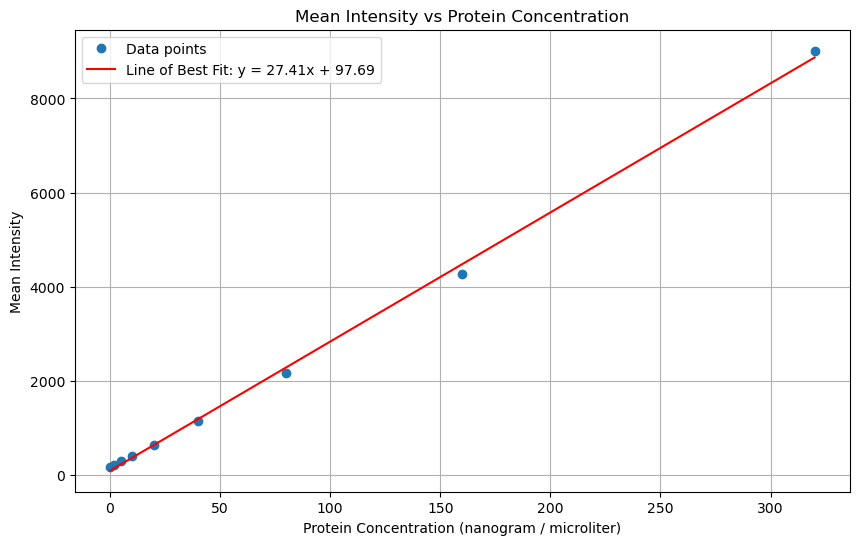

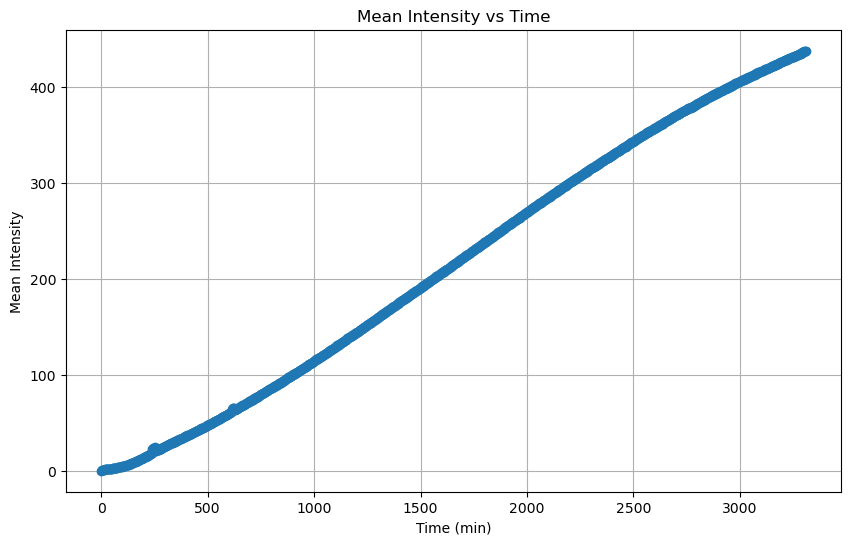

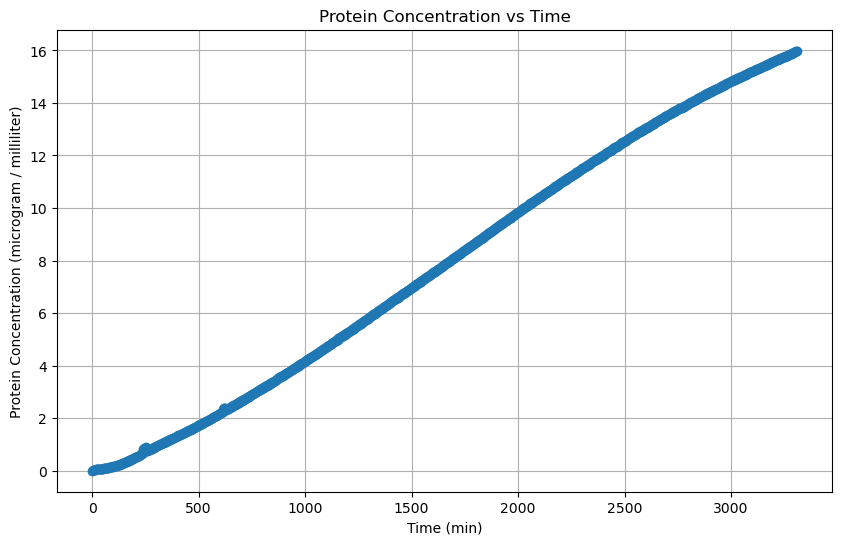

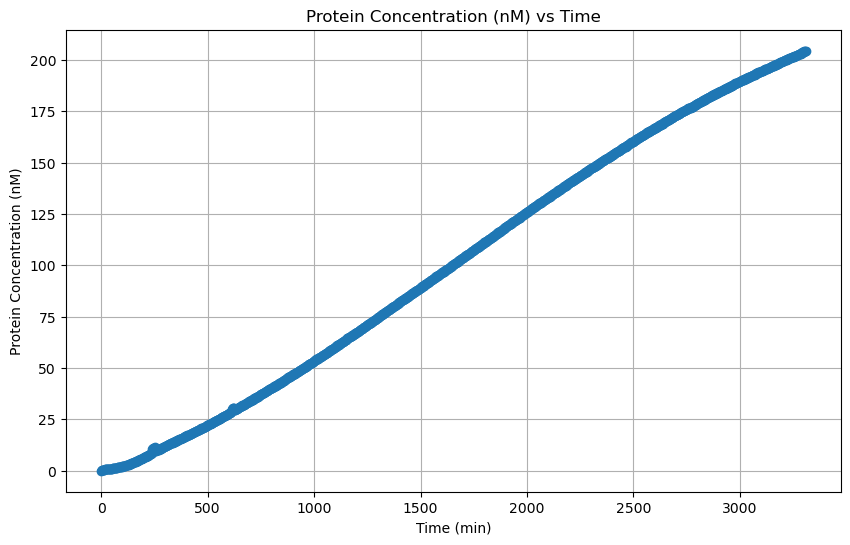

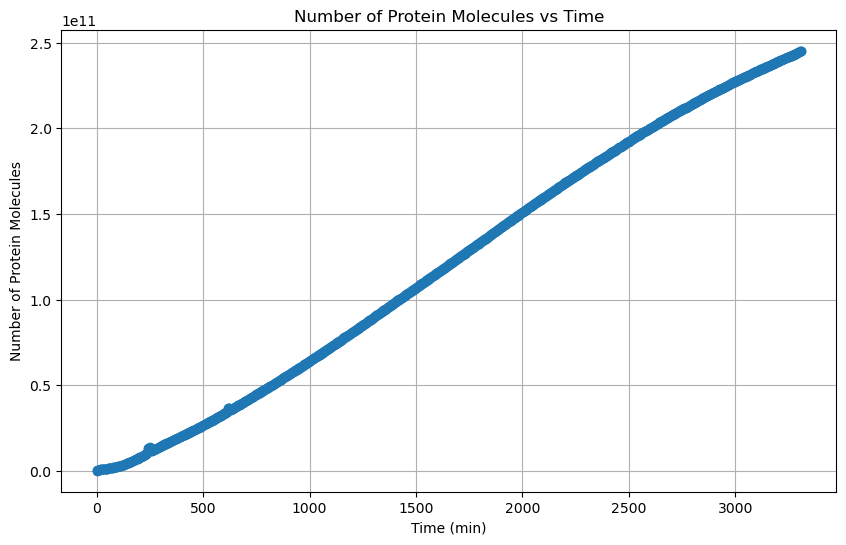

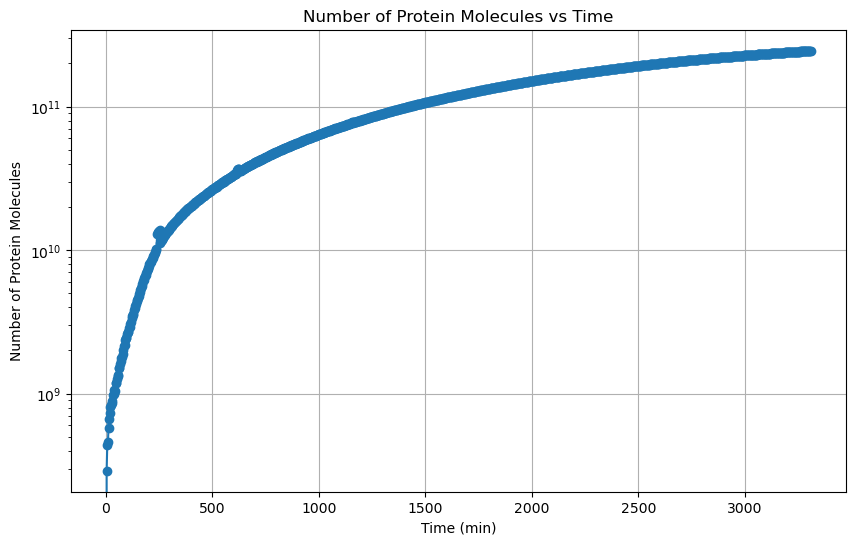

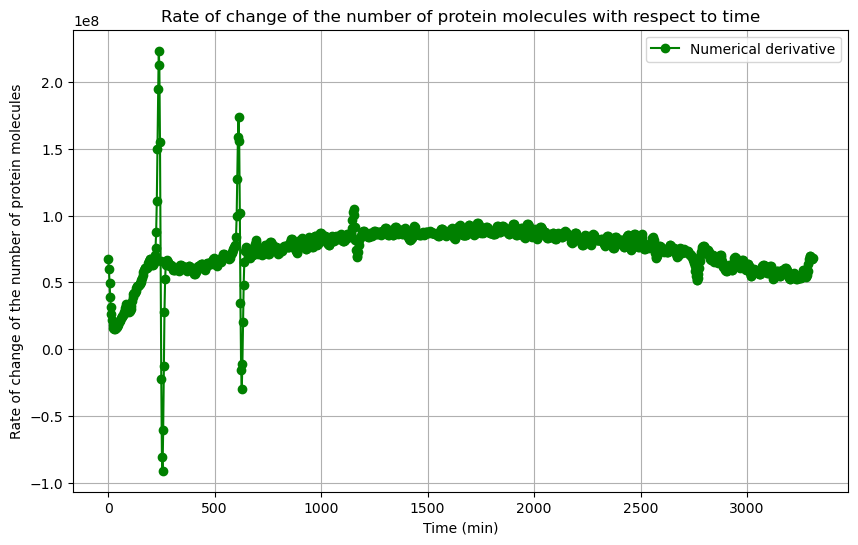

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the expected values as initial guesses:

k_TL: 9.979499579143322
k_TX: 0.23981885558343663
R_p: 30.012279378095684
tau_m: 718.0525041804935
K_TL: 5.001504771590312
R: 79.9736329942682
k_deg: 0.0
X_p: 0.4526164798807031
K_p: 3.95271010483593
tau_0: 0.0002475562954105115
tau_f: 298.7516978291736

This is the model whose optimized parameters were found using the expected values as initial guesses:


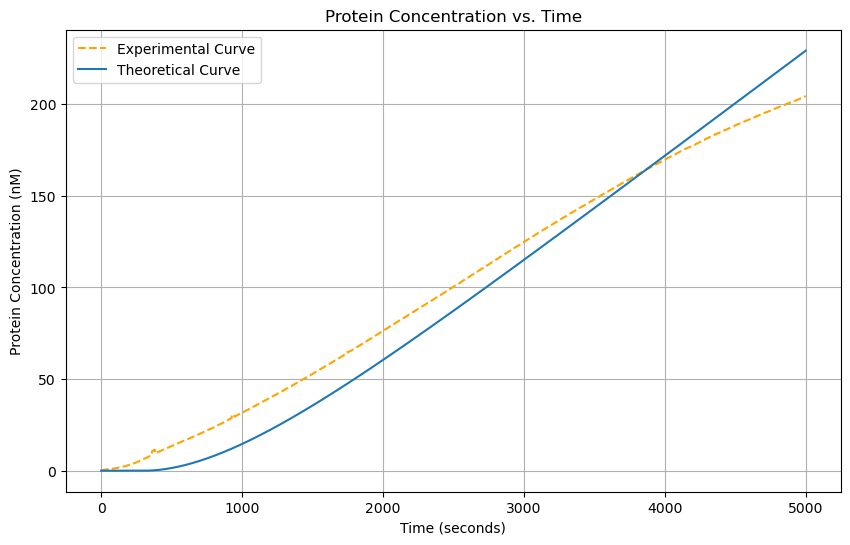

interactive(children=(FloatSlider(value=9.979499579143322, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.885763736146771, description='k_TL (amino acids/s)', layout=Layout(w…

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.185117318324302, description='k_TL (amino acids/s)', layout=Layout(…

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.71177506048572, description='k_TL (amino acids/s)', layout=Layout(w…

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.1488680407246D+04   r2 =  0.1756571471240D-04
The optimized parameters could not be found using the following RANDOM initial guesses:


[9.56033192149573, 1.235282396753384, 31.07758254429945, 743.4250728206547, 5.042871629709461, 72.54095570615142, 0.009944338100393892, 0.8677820212812591, 3.688679769347197, 0.0, 293.5472123570864]


/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.4988743794950D+03   r2 =  0.6142379503999D-05
The optimized parameters could not be found using the following RANDOM initial guesses:


[9.949635485733616, 1.2282911555901577, 28.70132494626485, 663.0757704276065, 5.3710505569499265, 81.31195973809236, 0.010703900253961693, 0.9432236644707963, 4.1766501312958795, 0.0, 337.9624535074464]
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.365975754720687, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.716012045463472, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.716012045463472
k_TX: 0.8861472645580548
R_p: 32.39594391580337
tau_m: 668.8030963560866
K_TL: 5.948535370946985
R: 60.000363890816
k_deg: 0.1737264140548404
X_p: 1.1192371742154703
K_p: 16.449805645151265
tau_0: 0.0
tau_f: 17.730737864390107

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.365975754720688, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.716012045463472
k_TX: 0.8861472645580548
R_p: 32.39594391580337
tau_m: 668.8030963560866
K_TL: 5.948535370946985
R: 60.000363890816
k_deg: 0.1737264140548404
X_p: 1.1192371742154703
K_p: 16.449805645151265
tau_0: 0.0
tau_f: 17.730737864390107


In [2]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")) # The paths must be sorted
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")) # These paths must also be sorted

# Provide your specific values for N_p, N_m, D, and initial guesses - Known data
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters -- Reasonable guesses
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # Protein production rate (molecules/s)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (units)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0     # Initial time delay (s)
tau_f = 300    # Final time delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
mp.runFullAnalysis(paths, calibration_curve_paths, 3, 2, 78.2, N_p, N_m, D, initial_guesses, "experimentalData_k401.csv", "optimizedParameters_k401.csv")

kif3

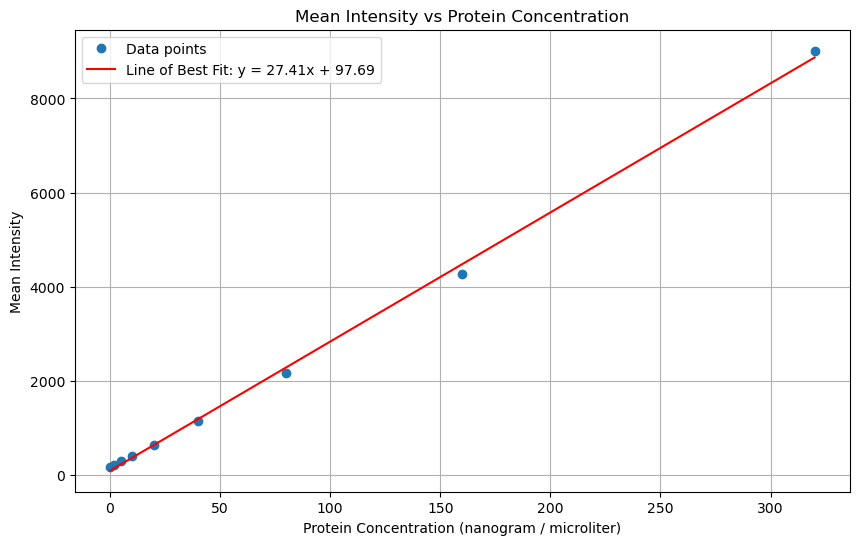

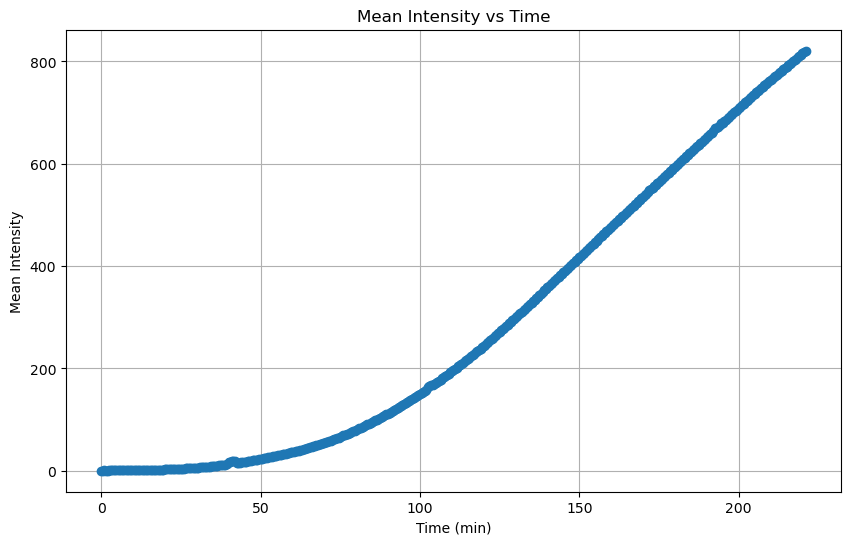

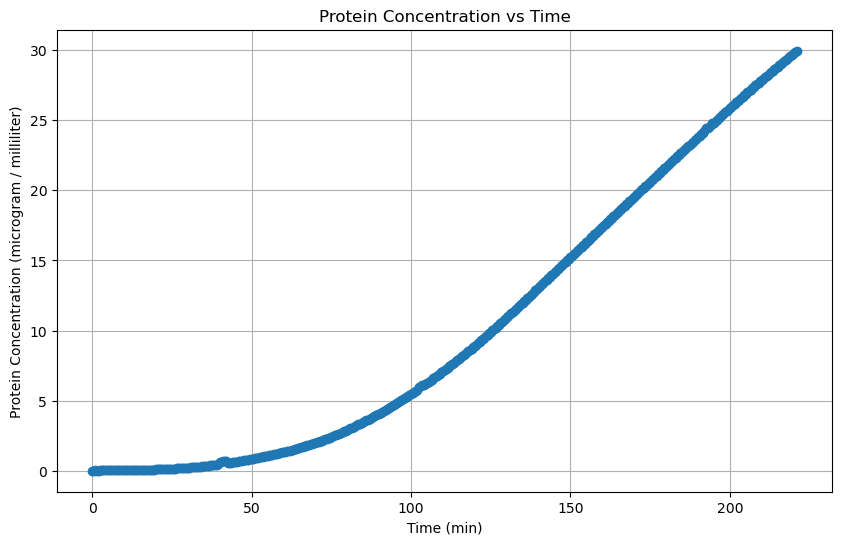

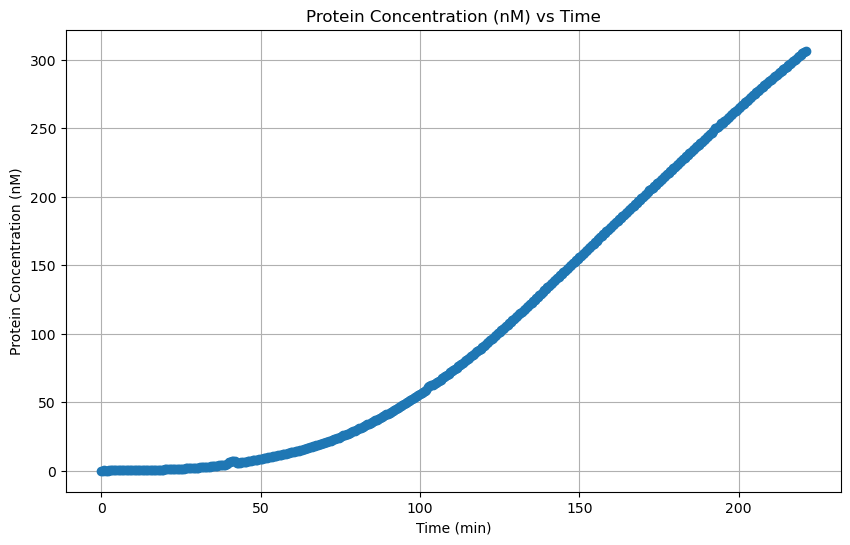

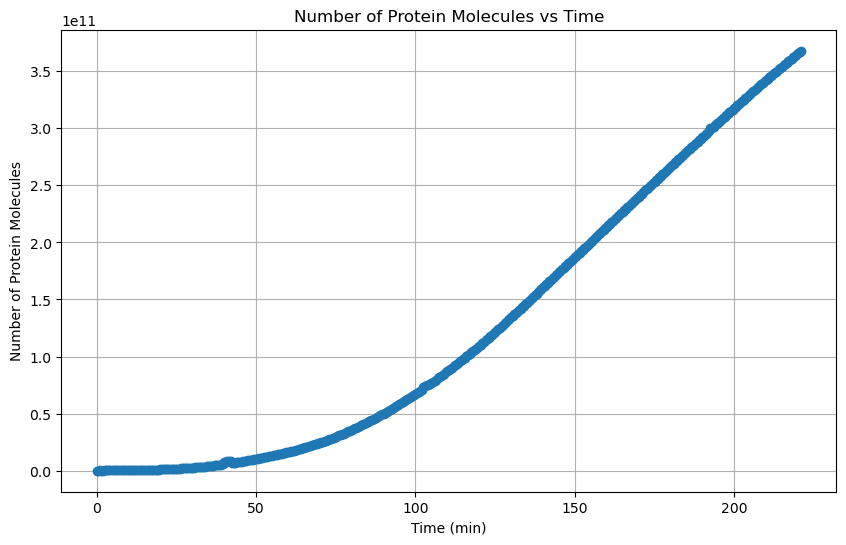

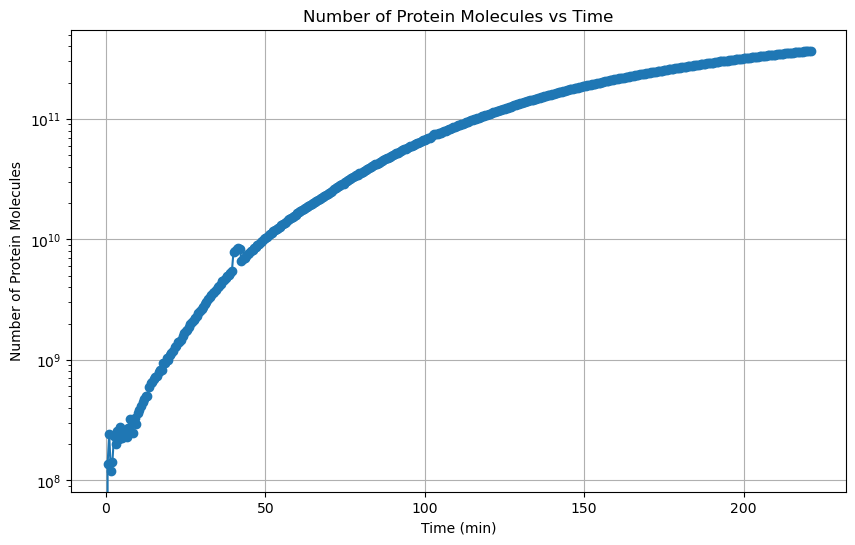

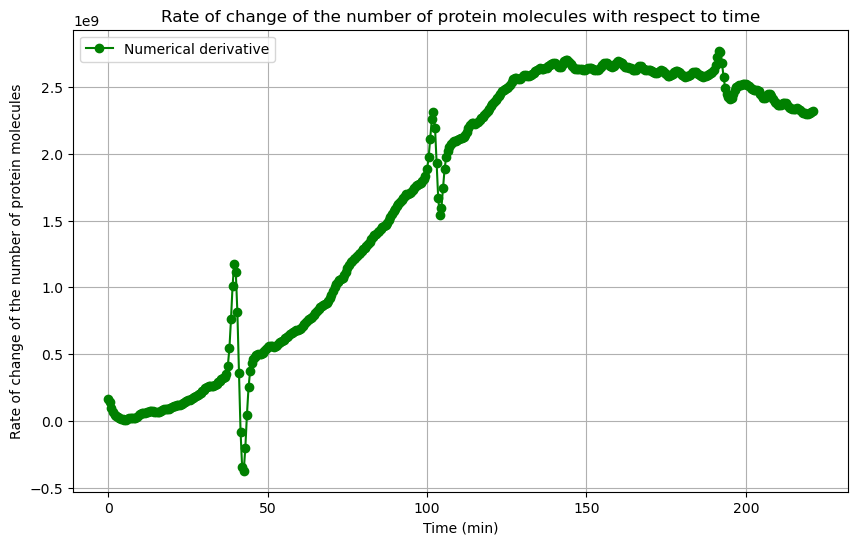

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the expected values as initial guesses:

k_TL: 10.159710602699661
k_TX: 1.922035098380654
R_p: 31.085389417788093
tau_m: 733.8366248532163
K_TL: 4.675318939955801
R: 80.91366930025833
k_deg: 0.13769119726961776
X_p: 1.16070533912756
K_p: 1e-06
tau_0: 0.018825598425464385
tau_f: 325.1285606454355

This is the model whose optimized parameters were found using the expected values as initial guesses:


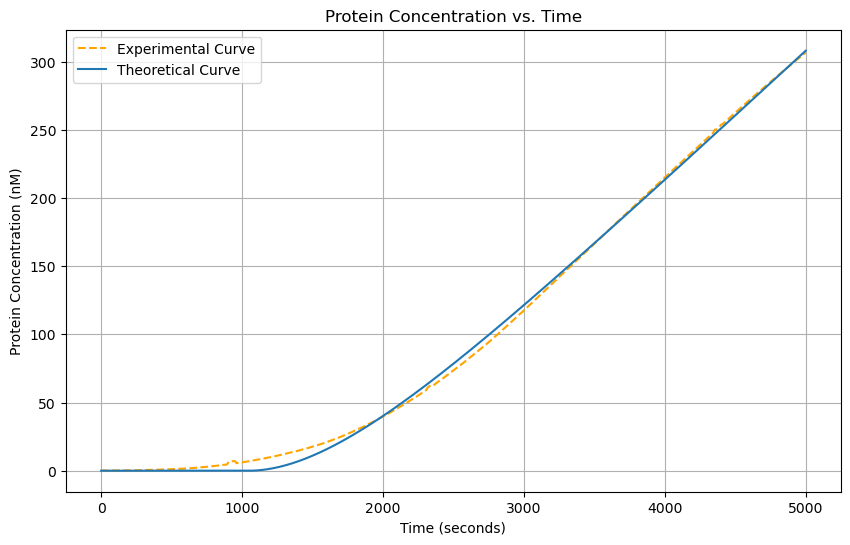

interactive(children=(FloatSlider(value=10.159710602699661, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.88963318515755, description='k_TL (amino acids/s)', layout=Layout(w…

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.398195378711328, description='k_TL (amino acids/s)', layout=Layout(…

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.527484388707308, description='k_TL (amino acids/s)', layout=Layout(…

This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.918886623763875, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.236236653372076, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.236236653372076
k_TX: 6.9503217404086755
R_p: 37.02776099548251
tau_m: 744.3981698321854
K_TL: 5.140303320202236
R: 77.05414644651717
k_deg: 0.7698997847019129
X_p: 1.2283926324863614
K_p: 3.2350676678598447
tau_0: 0.0054557643962391
tau_f: 277.45452422514563

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.403861038778182, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.236236653372076
k_TX: 6.9503217404086755
R_p: 37.02776099548251
tau_m: 744.3981698321854
K_TL: 5.140303320202236
R: 77.05414644651717
k_deg: 0.7698997847019129
X_p: 1.2283926324863614
K_p: 3.2350676678598447
tau_0: 0.0054557643962391
tau_f: 277.45452422514563


In [3]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/kif3-activedrops/img_*********_gfp-4x_000.tif"))
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif"))

# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# wrapper function to run the full analysis
# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
mp.runFullAnalysis(paths, calibration_curve_paths, 0.5, 2, 97.7, N_p, N_m, D, initial_guesses, "experimentalData_kif3.csv", "optimizedParameters_kif3.csv")
 

Chimera A 



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.82701408625168
k_TX: 0.8805385777706434
R_p: 29.728038406731486
tau_m: 719.582337696686
K_TL: 5.0714748856920195
R: 79.76645663610014
k_deg: 0.1878540459508713
X_p: 0.9999525197189314
K_p: 5.363246410227035
tau_0: 0.0
tau_f: 295.84233754589343

This is the model whose optimized parameters were found using the provided initial guesses:


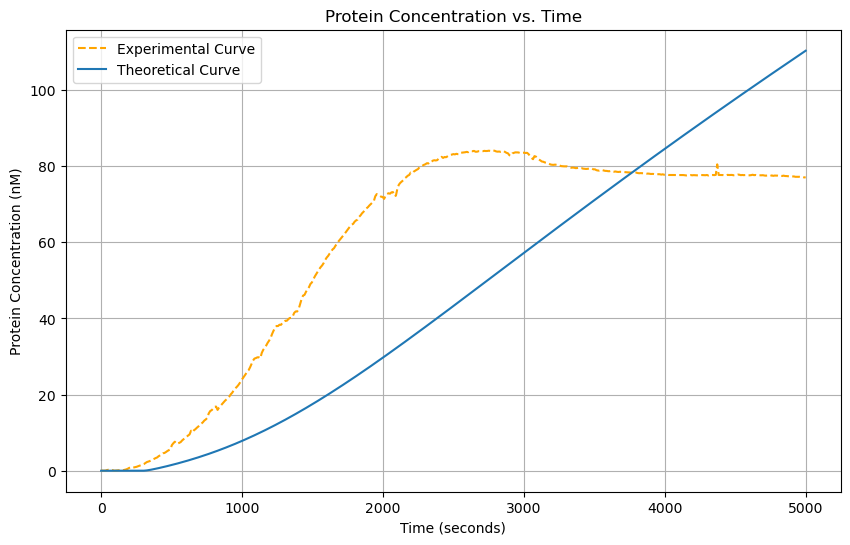

interactive(children=(FloatSlider(value=9.82701408625168, description='k_TL (amino acids/s)', layout=Layout(wi…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.833489510785945, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=11.34182640136276, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.8328258864230D+03   r2 =  0.8101672108638D-05
The optimized parameters could not be found using the following RANDOM initial guesses:


[9.435617785694847, 0.9386526177065397, 29.573442816969468, 725.4517971208473, 5.370069287148936, 89.08689546448615, 0.01030120642750209, 1.0815254808929229, 3.858412834386323, 0.0, 323.1506035905747]
57  sets of optimized parameters have been found so far
58  sets of optimized parameters have been found so far
59  sets of optimized parameters have been found so far
60  sets of optimized parameters have been found so far
61  sets of optimized parameters have been found so far
62  sets of optimized parameters have been found so far
63  sets of optimized parameters have been found so far
64  sets of optimized parameters have been found so far
65  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.792670602807505, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.1562653908886D+04   r2 =  0.9020586816011D-05
The optimized parameters could not be found using the following RANDOM initial guesses:


[10.176385826827284, 1.1150348179929255, 28.05791512681952, 788.0659125097029, 5.062411853536832, 88.78869044002228, 0.010115851828120949, 1.038229150267957, 3.686030061382837, 0.0, 320.81031092685765]
92  sets of optimized parameters have been found so far
93  sets of optimized parameters have been found so far
94  sets of optimized parameters have been found so far
95  sets of optimized parameters have been found so far
96  sets of optimized parameters have been found so far
97  sets of optimized parameters have been found so far
98  sets of optimized parameters have been found so far
99  sets of optimized parameters have been found so far
100  sets of optimized parameters have been fou

interactive(children=(FloatSlider(value=10.88353789454505, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=13.84761183094696, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 13.84761183094696
k_TX: 1.438889643904865
R_p: 42.60515373289931
tau_m: 575.7881211253493
K_TL: 0.2593109813104419
R: 87.61695756682718
k_deg: 0.4439805336693609
X_p: 2.117132817137218
K_p: 55.18171650008257
tau_0: 0.0048375538301481
tau_f: 386.49389269067456

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.506661745092764, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 13.84761183094696
k_TX: 1.438889643904865
R_p: 42.60515373289931
tau_m: 575.7881211253493
K_TL: 0.2593109813104419
R: 87.61695756682718
k_deg: 0.4439805336693609
X_p: 2.117132817137218
K_p: 55.18171650008257
tau_0: 0.0048375538301481
tau_f: 386.49389269067456


In [4]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_A.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_A.csv")

Chimera B



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.001098043780196
k_TX: 0.935897732650389
R_p: 30.01196065113629
tau_m: 716.2359909580157
K_TL: 4.947502901171809
R: 80.99448509773913
k_deg: 0.2444631768490666
X_p: 0.9848857950157424
K_p: 5.176568844309173
tau_0: 6.822946571283239e-06
tau_f: 244.50292249598704

This is the model whose optimized parameters were found using the provided initial guesses:


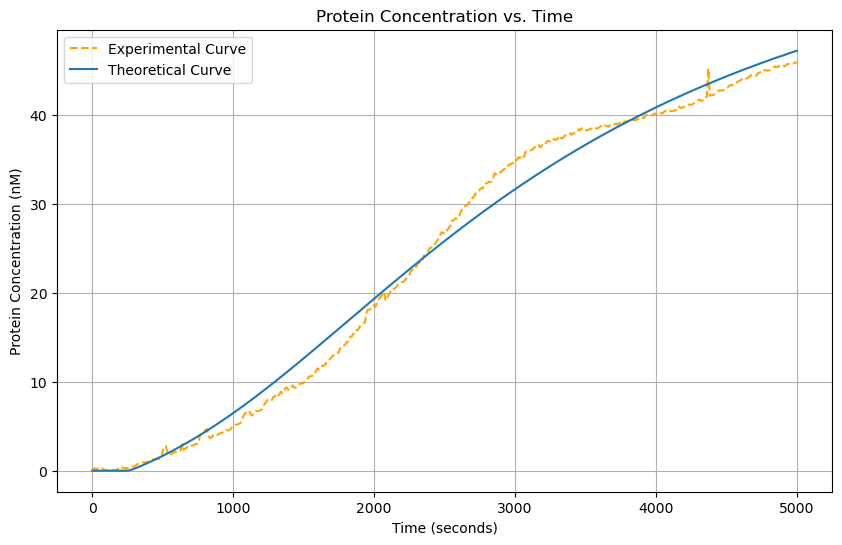

interactive(children=(FloatSlider(value=10.001098043780196, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.438595702551062, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=8.910828898123867, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.08771777691814, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.229630663816685, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=9.7680423349113, description='k_TL (amino acids/s)', layout=Layout(wid…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 9.7680423349113
k_TX: 5.9930093413331065
R_p: 35.29865812502379
tau_m: 591.2118014482608
K_TL: 5.90462303128205
R: 72.26865412700965
k_deg: 1.3608933318869276
X_p: 0.9574323961516882
K_p: 2.591557775577371
tau_0: 0.0503851009760545
tau_f: 315.6167451616791

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.766781094834355, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 9.7680423349113
k_TX: 5.9930093413331065
R_p: 35.29865812502379
tau_m: 591.2118014482608
K_TL: 5.90462303128205
R: 72.26865412700965
k_deg: 1.3608933318869276
X_p: 0.9574323961516882
K_p: 2.591557775577371
tau_0: 0.0503851009760545
tau_f: 315.6167451616791


In [5]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_B.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_B.csv")

Chimera C

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.971934230988126
k_TX: 0.7629284874834354
R_p: 29.995677615202055
tau_m: 719.9997840938524
K_TL: 5.002008203174171
R: 79.99986105695308
k_deg: 0.6994373117392314
X_p: 2.092342185577337
K_p: 3.999887472912924
tau_0: 2.1513457681976433e-11
tau_f: 300.00008984260444

This is the model whose optimized parameters were found using the provided initial guesses:


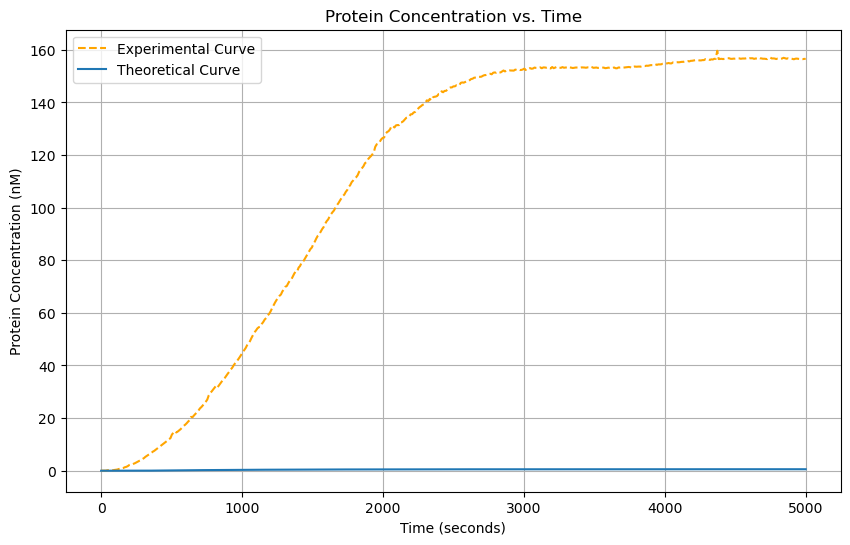

interactive(children=(FloatSlider(value=9.971934230988126, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.562962386867696, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.666030295495766, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=12.107283059241723, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.595465269493147, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=16.03624090113548, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 16.03624090113548
k_TX: 3.661942351864397
R_p: 34.78171799714971
tau_m: 591.069733411874
K_TL: 4.849363028926334
R: 175.801618303383
k_deg: 0.5468012280379284
X_p: 3.2495122327542845
K_p: 55.58475778415409
tau_0: 0.0
tau_f: 287.04510483315846

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.18416613930512, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 16.03624090113548
k_TX: 3.661942351864397
R_p: 34.78171799714971
tau_m: 591.069733411874
K_TL: 4.849363028926334
R: 175.801618303383
k_deg: 0.5468012280379284
X_p: 3.2495122327542845
K_p: 55.58475778415409
tau_0: 0.0
tau_f: 287.04510483315846


In [6]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_C.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_C.csv")

Chimera D

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.031469357760876
k_TX: 1.204896264186921
R_p: 30.25969706440881
tau_m: 677.6167816514503
K_TL: 4.929454408637206
R: 81.86972016424397
k_deg: 0.271898727509587
X_p: 1.095802444132289
K_p: 6.316446154767036
tau_0: 0.0
tau_f: 210.20621453857257

This is the model whose optimized parameters were found using the provided initial guesses:


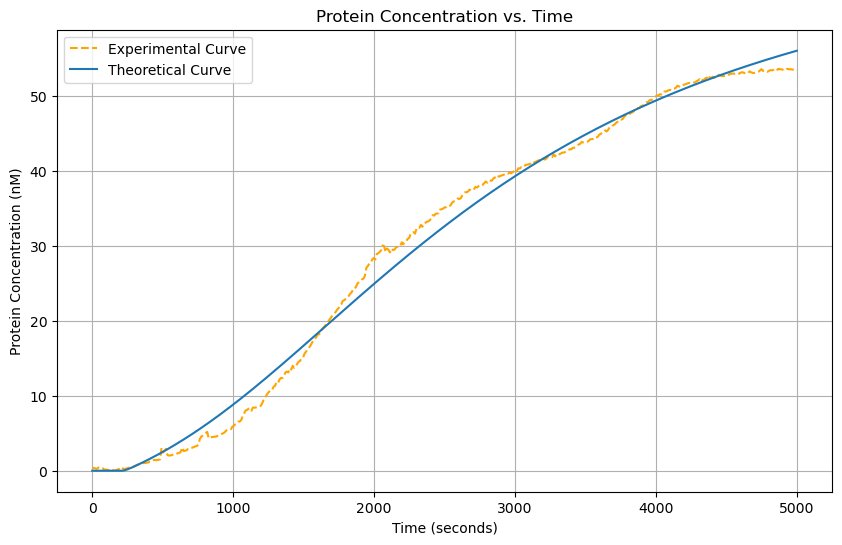

interactive(children=(FloatSlider(value=10.031469357760876, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.994066942961759, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=9.289641141663893, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.91276578428333, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.698717224586176, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.124318751190224, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.124318751190224
k_TX: 3.764029602287323
R_p: 16.680962540509398
tau_m: 586.8110232119254
K_TL: 7.551684576527045
R: 74.72021654251574
k_deg: 0.3111336882132676
X_p: 1.3713513335245864
K_p: 6.281044443357892
tau_0: 0.0854196808407641
tau_f: 387.86847347763705

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=8.322190383813464, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.124318751190224
k_TX: 3.764029602287323
R_p: 16.680962540509398
tau_m: 586.8110232119254
K_TL: 7.551684576527045
R: 74.72021654251574
k_deg: 0.3111336882132676
X_p: 1.3713513335245864
K_p: 6.281044443357892
tau_0: 0.0854196808407641
tau_f: 387.86847347763705


In [7]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_D.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_D.csv")

Chimera E

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.807366237698474
k_TX: 1.2353446525703191
R_p: 29.48568442640675
tau_m: 709.716027772334
K_TL: 6.902209905700246
R: 119.49284325766297
k_deg: 0.07651526727295277
X_p: 1.0588207161513878
K_p: 20.28357255153601
tau_0: 0.0
tau_f: 255.32730803600725

This is the model whose optimized parameters were found using the provided initial guesses:


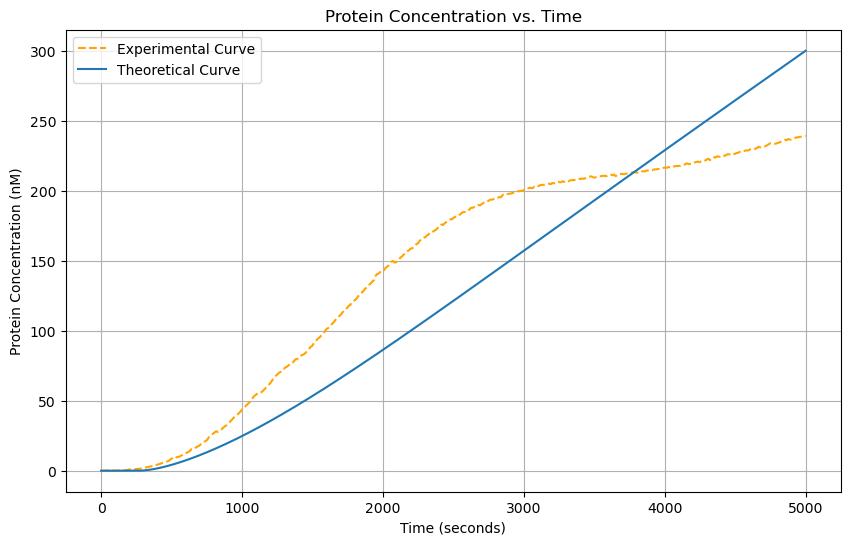

interactive(children=(FloatSlider(value=9.807366237698474, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.295679140266415, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.172945494489952, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=8.383655997013271, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.705628833974508, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=20.46609149893325, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 20.46609149893325
k_TX: 1.9846002877952245
R_p: 99.89087887789792
tau_m: 682.491759532164
K_TL: 6.566944991287961
R: 79.40053763594835
k_deg: 0.7623626170089466
X_p: 2.3957643875857286
K_p: 75.51008557955622
tau_0: 0.0083825597106104
tau_f: 337.26903487235336

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=11.154504598432863, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 20.46609149893325
k_TX: 1.9846002877952245
R_p: 99.89087887789792
tau_m: 682.491759532164
K_TL: 6.566944991287961
R: 79.40053763594835
k_deg: 0.7623626170089466
X_p: 2.3957643875857286
K_p: 75.51008557955622
tau_0: 0.0083825597106104
tau_f: 337.26903487235336


In [8]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_E.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_E.csv")

Chimera F

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.097317543229515
k_TX: 0.9962958890551619
R_p: 29.517710106886597
tau_m: 680.3055419558054
K_TL: 7.384939394038206
R: 102.56195312824565
k_deg: 0.10135618159944215
X_p: 1.07707923732832
K_p: 30.535681668797263
tau_0: 0.0
tau_f: 310.42465846464063

This is the model whose optimized parameters were found using the provided initial guesses:


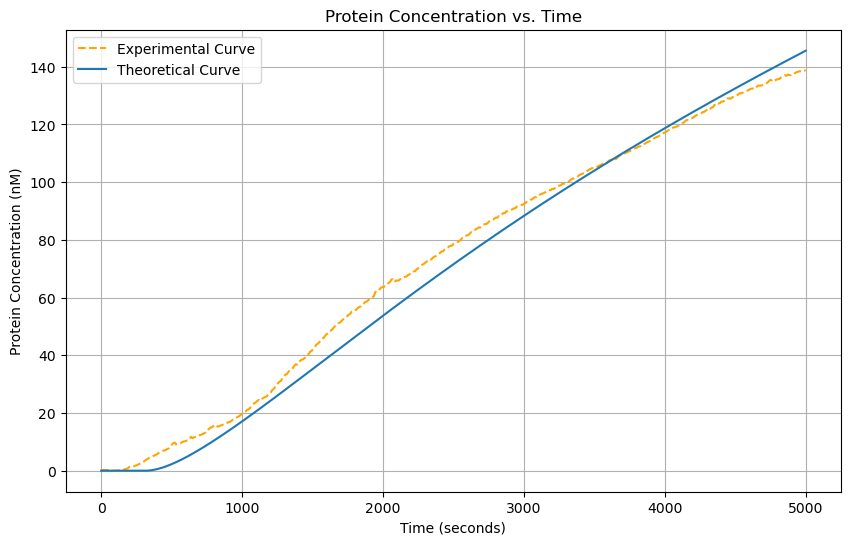

interactive(children=(FloatSlider(value=10.097317543229515, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.115463319534527, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=12.48869037284939, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.427320402648085, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.184006220597105, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.099307319910343, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.099307319910343
k_TX: 0.9113218995310888
R_p: 30.68510756457772
tau_m: 562.2306791843789
K_TL: 5.175987898229586
R: 86.07647365033961
k_deg: 0.1012673462871092
X_p: 0.974065340379326
K_p: 51.404221192024224
tau_0: 0.0857875533761012
tau_f: 197.67652457577935

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.146621583488034, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.099307319910343
k_TX: 0.9113218995310888
R_p: 30.68510756457772
tau_m: 562.2306791843789
K_TL: 5.175987898229586
R: 86.07647365033961
k_deg: 0.1012673462871092
X_p: 0.974065340379326
K_p: 51.404221192024224
tau_0: 0.0857875533761012
tau_f: 197.67652457577935


In [9]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_F.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_F.csv")

Chimera G

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.008352726654664
k_TX: 1.0692751976921286
R_p: 30.496685745286925
tau_m: 701.0515292012292
K_TL: 2.435142680176938
R: 108.24703026171767
k_deg: 0.1316892484995691
X_p: 1.3901767541160268
K_p: 21.595150072800312
tau_0: 4.695879241012335e-10
tau_f: 311.9803253757923

This is the model whose optimized parameters were found using the provided initial guesses:


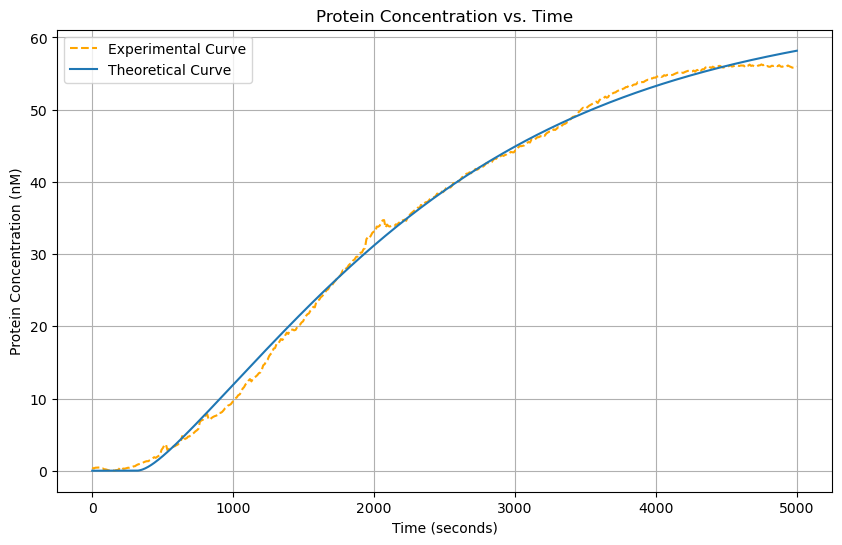

interactive(children=(FloatSlider(value=10.008352726654664, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.187372277408834, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=8.689447702539574, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.590468866273952, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.157021143657147, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.69972022049631, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.69972022049631
k_TX: 3.4226677821786424
R_p: 30.900536970906927
tau_m: 624.1270971775543
K_TL: 4.220488227723521
R: 85.5849469160683
k_deg: 0.3220874480652682
X_p: 1.56558725255789
K_p: 9.091330372298827
tau_0: 0.0
tau_f: 309.56082169018725

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=7.950184111317952, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.69972022049631
k_TX: 3.4226677821786424
R_p: 30.900536970906927
tau_m: 624.1270971775543
K_TL: 4.220488227723521
R: 85.5849469160683
k_deg: 0.3220874480652682
X_p: 1.56558725255789
K_p: 9.091330372298827
tau_0: 0.0
tau_f: 309.56082169018725


In [10]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_G.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_G.csv")

Chimera H

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.605956076324567
k_TX: 1.1656879553071349
R_p: 35.80036259097204
tau_m: 671.3377304190785
K_TL: 1.687239653542072
R: 99.78695750350141
k_deg: 0.22494646961794018
X_p: 1.364010216339608
K_p: 55.28011501346472
tau_0: 0.012997428718532156
tau_f: 299.6605673291233

This is the model whose optimized parameters were found using the provided initial guesses:


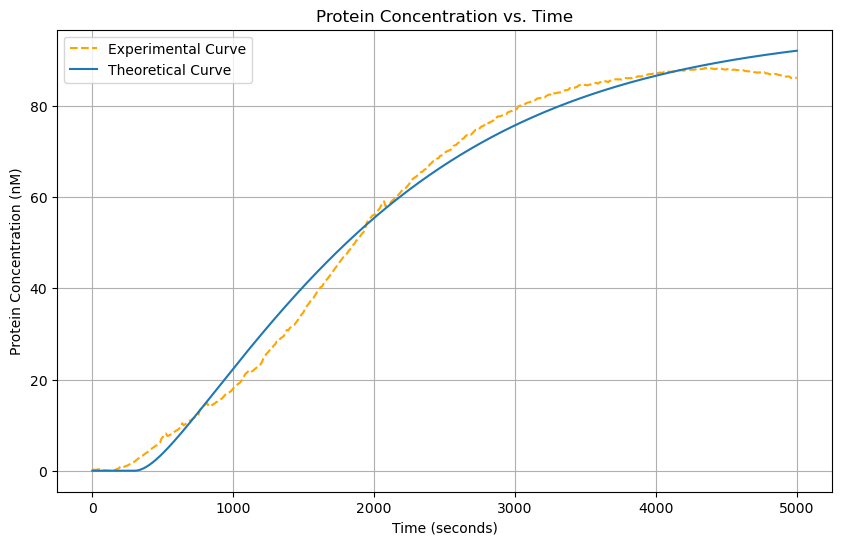

interactive(children=(FloatSlider(value=11.605956076324567, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.640465960474387, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=9.753257107001403, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.88792097607211, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.768780088105835, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.854827099505869, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.854827099505869
k_TX: 6.242004102536114
R_p: 37.06127904329804
tau_m: 593.0965922061964
K_TL: 3.7514694239082544
R: 71.14711700173694
k_deg: 0.4561398634032514
X_p: 2.119308096133466
K_p: 18.21807369318734
tau_0: 0.0585480412564889
tau_f: 343.3412961756212

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.642383798167664, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.854827099505869
k_TX: 6.242004102536114
R_p: 37.06127904329804
tau_m: 593.0965922061964
K_TL: 3.7514694239082544
R: 71.14711700173694
k_deg: 0.4561398634032514
X_p: 2.119308096133466
K_p: 18.21807369318734
tau_0: 0.0585480412564889
tau_f: 343.3412961756212


In [11]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_H.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_H.csv")

AcSu



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.302143917137656
k_TX: 1.0208077711719596
R_p: 32.07502283417929
tau_m: 724.3326055031
K_TL: 4.894996497134208
R: 80.01911978323392
k_deg: 0.13079321589181347
X_p: 1.1209508343058872
K_p: 14.505318947194418
tau_0: 9.607583339210635e-05
tau_f: 300.89393809010255

This is the model whose optimized parameters were found using the provided initial guesses:


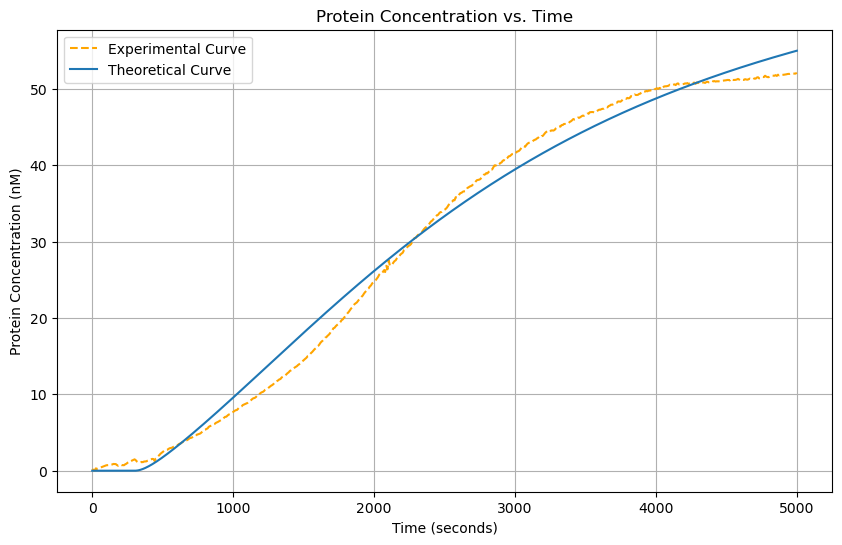

interactive(children=(FloatSlider(value=11.302143917137656, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.976454993551755, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.552255174203282, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.376357446348457, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.429154314459154, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=9.376357446348456, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 9.376357446348456
k_TX: 5.457977038630894
R_p: 29.20999724995147
tau_m: 601.6026983834938
K_TL: 5.005004165465451
R: 71.1595503205109
k_deg: 0.4403937215565747
X_p: 0.9549174618483676
K_p: 6.158390697698074
tau_0: 2.6489861535416992e-05
tau_f: 343.9785951344709

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=8.944417412031292, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 9.376357446348456
k_TX: 5.457977038630894
R_p: 29.20999724995147
tau_m: 601.6026983834938
K_TL: 5.005004165465451
R: 71.1595503205109
k_deg: 0.4403937215565747
X_p: 0.9549174618483676
K_p: 6.158390697698074
tau_0: 2.6489861535416992e-05
tau_f: 343.9785951344709


In [12]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AcSu.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AcSu.csv")

AcSu2

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 14.781322203925725
k_TX: 1.7897679450260284
R_p: 50.151172056647795
tau_m: 596.8718866632958
K_TL: 4.4912238972793475
R: 158.3125034666163
k_deg: 0.290287180966466
X_p: 1.8474798788169835
K_p: 29.01008285476227
tau_0: 0.0026617817298379975
tau_f: 168.39934378040073

This is the model whose optimized parameters were found using the provided initial guesses:


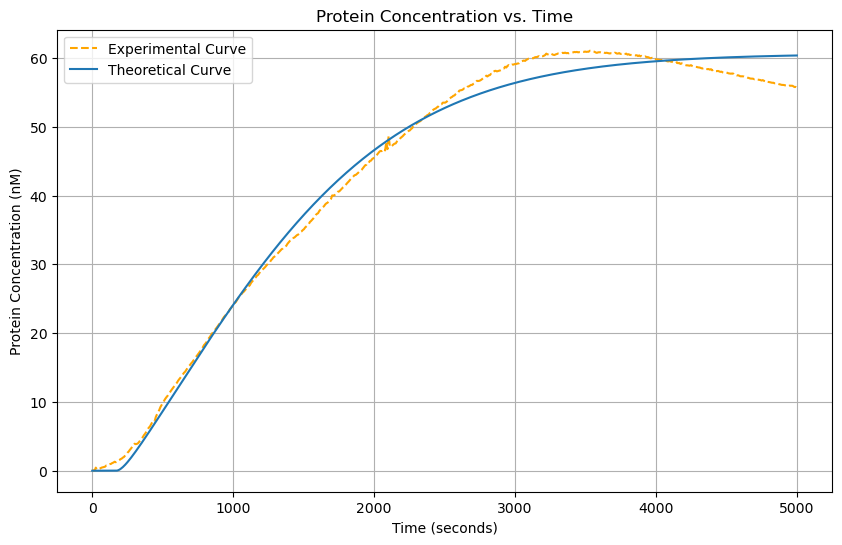

interactive(children=(FloatSlider(value=14.781322203925725, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.295659955919774, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=17.844149396792282, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.227527804780138, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.055442796872256, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=12.350701834767492, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 12.350701834767492
k_TX: 5.794777330992865
R_p: 35.26224549115739
tau_m: 672.8221625095789
K_TL: 4.067378194722643
R: 139.65193608552948
k_deg: 0.6034858263458247
X_p: 1.794974844771616
K_p: 27.994076803525815
tau_0: 0.0047340098973727
tau_f: 168.2666028176203

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=11.214833333289093, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 12.350701834767492
k_TX: 5.794777330992865
R_p: 35.26224549115739
tau_m: 672.8221625095789
K_TL: 4.067378194722643
R: 139.65193608552948
k_deg: 0.6034858263458247
X_p: 1.794974844771616
K_p: 27.994076803525815
tau_0: 0.0047340098973727
tau_f: 168.2666028176203


In [13]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AcSu2.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AcSu2.csv")

AdPa

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 23.240873915112576
k_TX: 6.056065174696158
R_p: 39.119254437649715
tau_m: 711.8158297447992
K_TL: 0.0
R: 56.590730853255025
k_deg: 1.1483117287613283
X_p: 3.8553474297994796
K_p: 100.0
tau_0: 0.0
tau_f: 296.0895706795344

This is the model whose optimized parameters were found using the provided initial guesses:


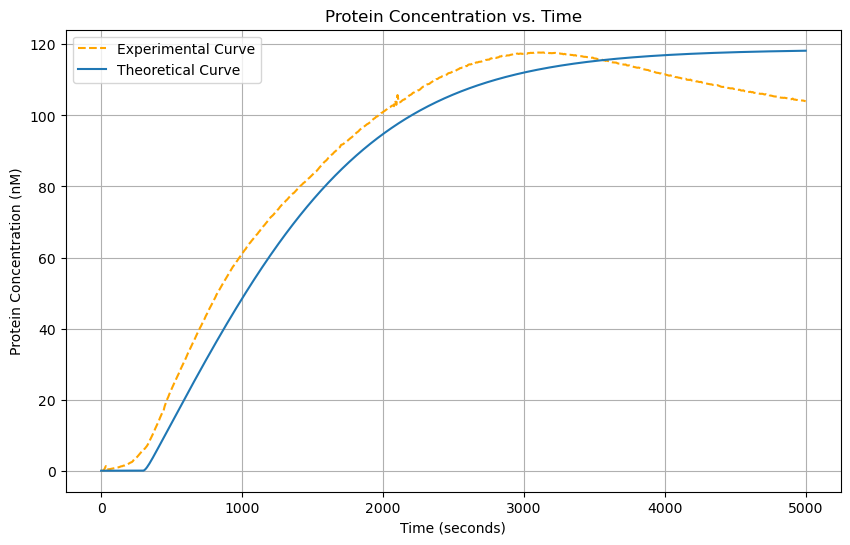

interactive(children=(FloatSlider(value=23.240873915112576, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=4.123471027440701, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.943677821876754, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=28.898099157473784, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=34.51685703536292, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=17.768498668948546, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 17.768498668948546
k_TX: 3.7724969387335534
R_p: 50.087932629042655
tau_m: 301.63414475650734
K_TL: 2.3956026035169415
R: 212.80110271834317
k_deg: 0.4064748444279971
X_p: 2.077643593933516
K_p: 39.79343510818798
tau_0: 0.0
tau_f: 161.07561465627987

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.665079690108485, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 17.768498668948546
k_TX: 3.7724969387335534
R_p: 50.087932629042655
tau_m: 301.63414475650734
K_TL: 2.3956026035169415
R: 212.80110271834317
k_deg: 0.4064748444279971
X_p: 2.077643593933516
K_p: 39.79343510818798
tau_0: 0.0
tau_f: 161.07561465627987


In [14]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2115  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AdPa.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AdPa.csv")

BleSto

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.913777655342273
k_TX: 0.49885378943294256
R_p: 29.880404625813412
tau_m: 716.9804033579435
K_TL: 4.985082329312327
R: 79.81278538162059
k_deg: 0.01106229466540043
X_p: 1.0866860796693345
K_p: 5.2558342607536375
tau_0: 0.0
tau_f: 299.17192196662506

This is the model whose optimized parameters were found using the provided initial guesses:


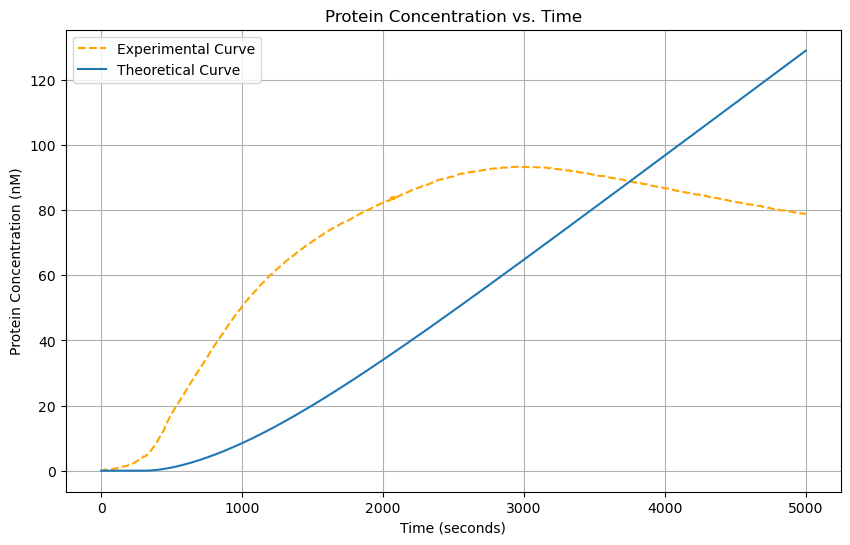

interactive(children=(FloatSlider(value=9.913777655342273, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.598605070501662, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.492415647565231, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.106506319299818, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.662152256235409, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=24.673450251794375, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 24.673450251794375
k_TX: 2.873539864150807
R_p: 83.56986566388198
tau_m: 392.5129731830707
K_TL: 1.7508544784025233
R: 161.23508185986014
k_deg: 0.6913000500626367
X_p: 1.9665922601234056
K_p: 43.14403065327935
tau_0: 0.0058767517593132
tau_f: 215.41392764113743

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=11.01112391041596, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 24.673450251794375
k_TX: 2.873539864150807
R_p: 83.56986566388198
tau_m: 392.5129731830707
K_TL: 1.7508544784025233
R: 161.23508185986014
k_deg: 0.6913000500626367
X_p: 1.9665922601234056
K_p: 43.14403065327935
tau_0: 0.0058767517593132
tau_f: 215.41392764113743


In [15]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2604  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_BleSto.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_BleSto.csv")

DiPu

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.181444239757084
k_TX: 1.1771504003251536
R_p: 30.528477823511565
tau_m: 696.1326654591933
K_TL: 3.8026370154829436
R: 84.53458017086479
k_deg: 0.124454379964682
X_p: 1.1333397160740617
K_p: 18.024914645389682
tau_0: 3.838817796975036e-08
tau_f: 46.77080350831466

This is the model whose optimized parameters were found using the provided initial guesses:


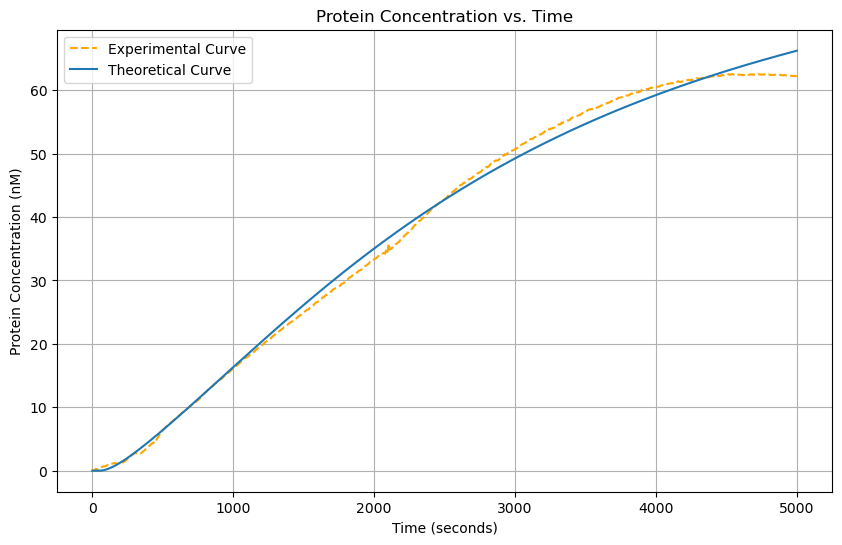

interactive(children=(FloatSlider(value=10.181444239757084, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.773609914528777, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=11.240656910595725, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.937980364983062, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.560795213427895, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.240656910595725, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.240656910595725
k_TX: 1.4093989653089665
R_p: 35.620627628409295
tau_m: 1006.6392491058087
K_TL: 5.888011412524378
R: 88.69735412931311
k_deg: 0.2510541405886997
X_p: 1.3844034705623756
K_p: 26.132031876736143
tau_0: 0.0003395230742277
tau_f: 86.31461215186471

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.421085341522428, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.240656910595725
k_TX: 1.4093989653089665
R_p: 35.620627628409295
tau_m: 1006.6392491058087
K_TL: 5.888011412524378
R: 88.69735412931311
k_deg: 0.2510541405886997
X_p: 1.3844034705623756
K_p: 26.132031876736143
tau_0: 0.0003395230742277
tau_f: 86.31461215186471


In [16]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_DiPu.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_DiPu.csv")

HeAl

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.819506941044004
k_TX: 0.5299461164213284
R_p: 29.976667404213828
tau_m: 719.5379896040308
K_TL: 5.0091225992402855
R: 79.99992134452259
k_deg: 0.00850841233427957
X_p: 4.450470388780701
K_p: 4.01254344425859
tau_0: 0.0
tau_f: 299.92186820883194

This is the model whose optimized parameters were found using the provided initial guesses:


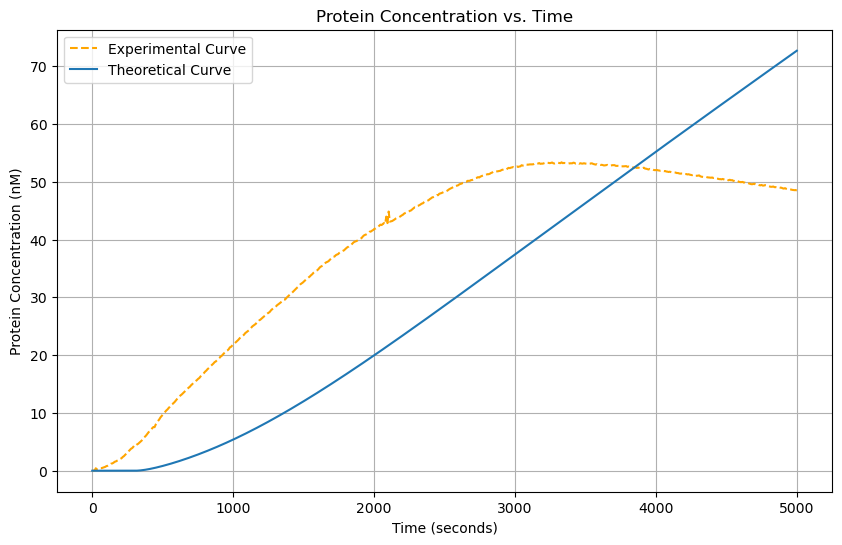

interactive(children=(FloatSlider(value=9.819506941044004, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.90174393301647, description='k_TL (amino acids/s)', layout=Layout(wi…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=14.679716930814372, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.56846079620962, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.77986745749017, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=12.52477911979254, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 12.52477911979254
k_TX: 2.2901141073536806
R_p: 45.62680080076231
tau_m: 612.2577666570382
K_TL: 3.3257701713314063
R: 94.06345318551725
k_deg: 0.3454031457207875
X_p: 1.6473034733576242
K_p: 26.73072643636752
tau_0: 0.0014252540164152
tau_f: 123.30159831171886

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=8.383689013360893, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 12.52477911979254
k_TX: 2.2901141073536806
R_p: 45.62680080076231
tau_m: 612.2577666570382
K_TL: 3.3257701713314063
R: 94.06345318551725
k_deg: 0.3454031457207875
X_p: 1.6473034733576242
K_p: 26.73072643636752
tau_0: 0.0014252540164152
tau_f: 123.30159831171886


In [17]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2430  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_HeAl.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_HeAl.csv")

NaGr

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.298246063237563
k_TX: 1.882846088118562
R_p: 34.074669116791654
tau_m: 533.0893211778966
K_TL: 3.095129624745404
R: 86.89803026017353
k_deg: 0.22624587329620738
X_p: 1.407319741464022
K_p: 30.447937611115442
tau_0: 0.000403238515432669
tau_f: 14.232878134928228

This is the model whose optimized parameters were found using the provided initial guesses:


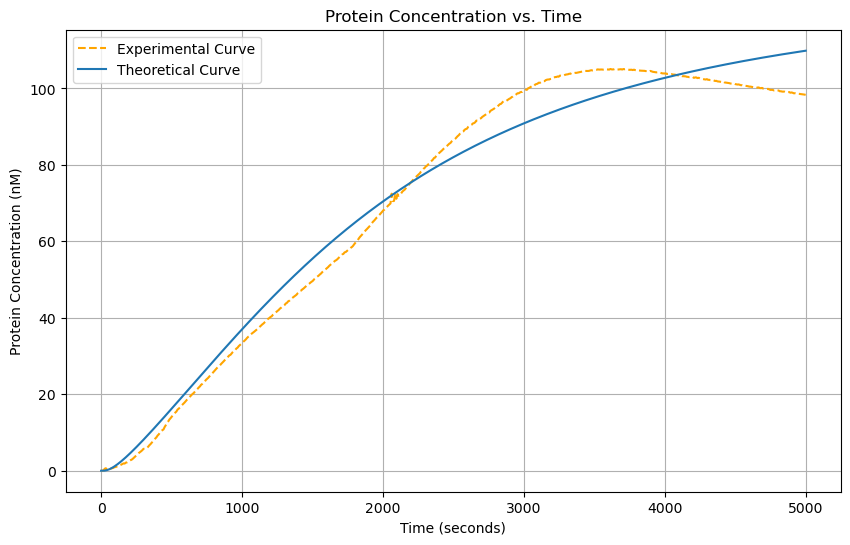

interactive(children=(FloatSlider(value=11.298246063237563, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.848398816400227, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=10.271063484549174, description='k_TL (amino acids/s)', layout=Layout(…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.296753786344816, description='k_TL (amino acids/s)', layout=Layout(…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=10.90090854311039, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=36.06140499102979, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 36.06140499102979
k_TX: 3.5145986696387013
R_p: 34.03188145217817
tau_m: 744.0049085059773
K_TL: 4.200216489153206
R: 61.62240296656876
k_deg: 0.9438632911320042
X_p: 2.9172137205803494
K_p: 39.685231140954045
tau_0: 0.0
tau_f: 274.0541162311275

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.226815199172272, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 36.06140499102979
k_TX: 3.5145986696387013
R_p: 34.03188145217817
tau_m: 744.0049085059773
K_TL: 4.200216489153206
R: 61.62240296656876
k_deg: 0.9438632911320042
X_p: 2.9172137205803494
K_p: 39.685231140954045
tau_0: 0.0
tau_f: 274.0541162311275


In [18]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2067  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_NaGr.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_NaGr.csv")

TiLa

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.620165666577478
k_TX: 1.3096579990058714
R_p: 59.53632274972992
tau_m: 288.23210349029387
K_TL: 5.977421724501838
R: 94.42642417474582
k_deg: 0.0
X_p: 1.0121898518379453
K_p: 4.00036991031903
tau_0: 0.0
tau_f: 440.1921100103766

This is the model whose optimized parameters were found using the provided initial guesses:


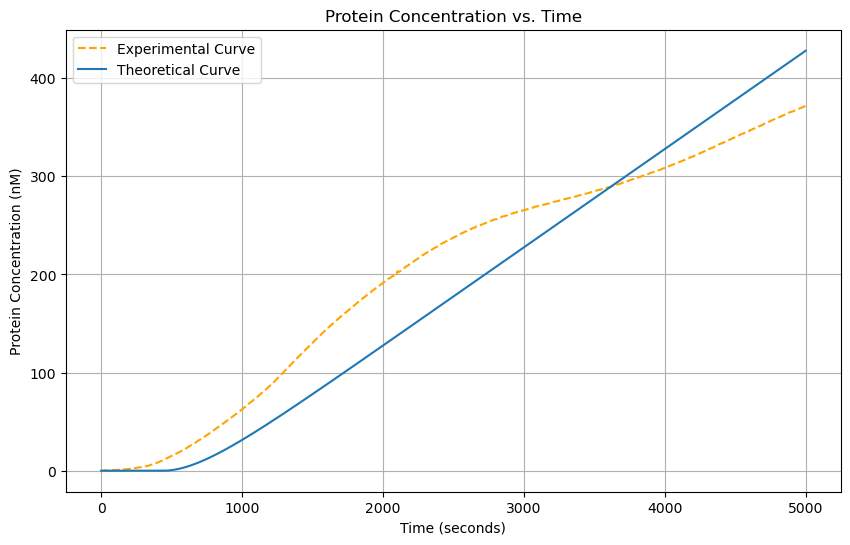

interactive(children=(FloatSlider(value=9.620165666577478, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.977298437424103, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
11  sets of optimized parameters have been found so far
12  sets of optimized parameters have been found so far
13  sets of optimized parameters have been found so far
14  sets of optimized parameters have been found so far
15  sets of optimized parameters have been found so far
16  sets of optimized parameters have been found so far
17  sets of optimized parameters have been found so far
18  sets of optimized parameters have been found so far
19  sets of optimized parameters have been found so far


interactive(children=(FloatSlider(value=9.549742006540463, description='k_TL (amino acids/s)', layout=Layout(w…

35  sets of optimized parameters have been found so far
36  sets of optimized parameters have been found so far
37  sets of optimized parameters have been found so far
38  sets of optimized parameters have been found so far
39  sets of optimized parameters have been found so far
40  sets of optimized parameters have been found so far
41  sets of optimized parameters have been found so far
42  sets of optimized parameters have been found so far
43  sets of optimized parameters have been found so far
44  sets of optimized parameters have been found so far
45  sets of optimized parameters have been found so far
46  sets of optimized parameters have been found so far
47  sets of optimized parameters have been found so far
48  sets of optimized parameters have been found so far
49  sets of optimized parameters have been found so far
50  sets of optimized parameters have been found so far
51  sets of optimized parameters have been found so far
52  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=9.605394622854753, description='k_TL (amino acids/s)', layout=Layout(w…

68  sets of optimized parameters have been found so far
69  sets of optimized parameters have been found so far
70  sets of optimized parameters have been found so far
71  sets of optimized parameters have been found so far
72  sets of optimized parameters have been found so far
73  sets of optimized parameters have been found so far
74  sets of optimized parameters have been found so far
75  sets of optimized parameters have been found so far
76  sets of optimized parameters have been found so far
77  sets of optimized parameters have been found so far
78  sets of optimized parameters have been found so far
79  sets of optimized parameters have been found so far
80  sets of optimized parameters have been found so far
81  sets of optimized parameters have been found so far
82  sets of optimized parameters have been found so far
83  sets of optimized parameters have been found so far
84  sets of optimized parameters have been found so far
85  sets of optimized parameters have been found

interactive(children=(FloatSlider(value=11.890910031940003, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=13.952897148997565, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 13.952897148997565
k_TX: 2.413033624863303
R_p: 34.17695263155571
tau_m: 151.01366973463382
K_TL: 1.8127980147632172
R: 106.48767096036744
k_deg: 0.0
X_p: 1.1593422309594246
K_p: 3.3807458797779475
tau_0: 0.0
tau_f: 0.0

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=12.048737784253817, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 13.952897148997565
k_TX: 2.413033624863303
R_p: 34.17695263155571
tau_m: 151.01366973463382
K_TL: 1.8127980147632172
R: 106.48767096036744
k_deg: 0.0
X_p: 1.1593422309594246
K_p: 3.3807458797779475
tau_0: 0.0
tau_f: 0.0


In [19]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2430  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_TiLa.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_TiLa.csv")

1.- make sure the constrained optimization works for k401 and kif3 with the specified first guesses

2.- the code should generate protein concentration vs time plots for k401 and kif3 (overlapped -- all). Make sure time is in the same units in all plots (minutes)

3.- generate the experimental plot overlapped with the theoretical for each individual protein (k401 and kif3)

4.- everything should run upon the wrapper function

5.- generate the plot with sliders for each individual protein. Set inferred parameters as slider preset value.

6.- create a scatter plot where the x axis is the different parameters names, the y axis is the value, and the color is the protein name.

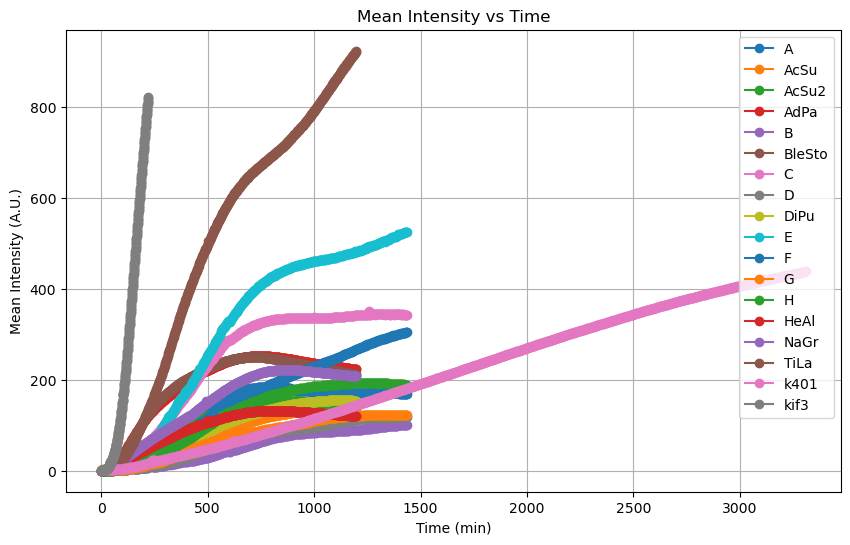

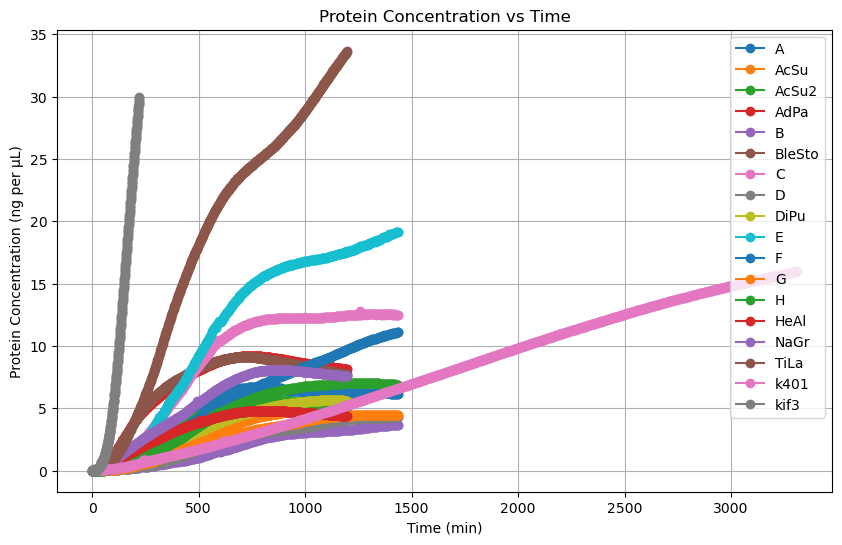

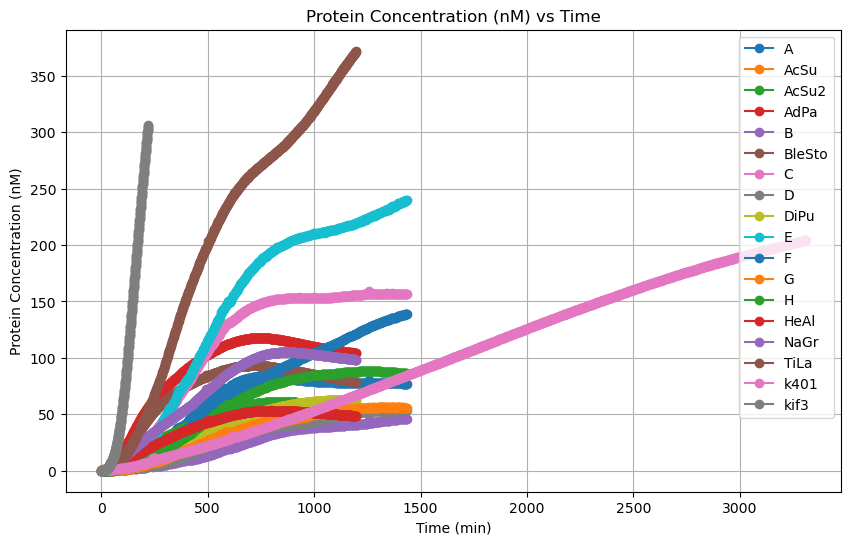

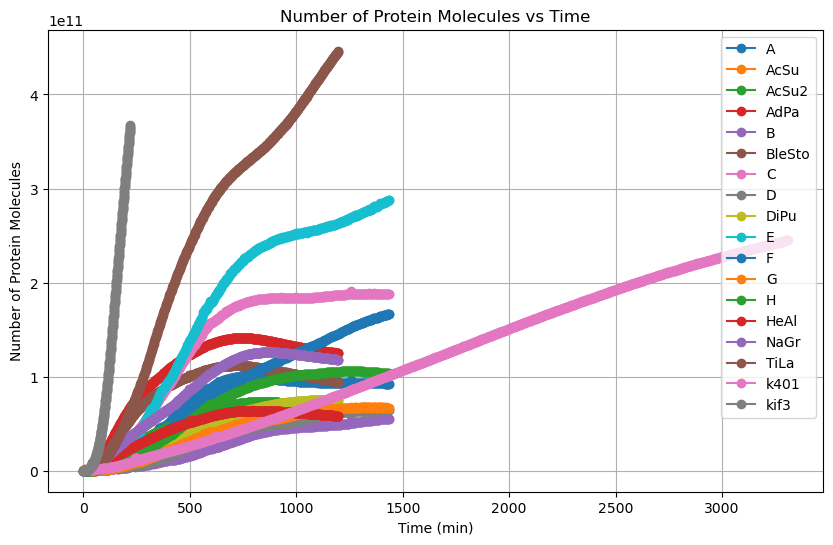

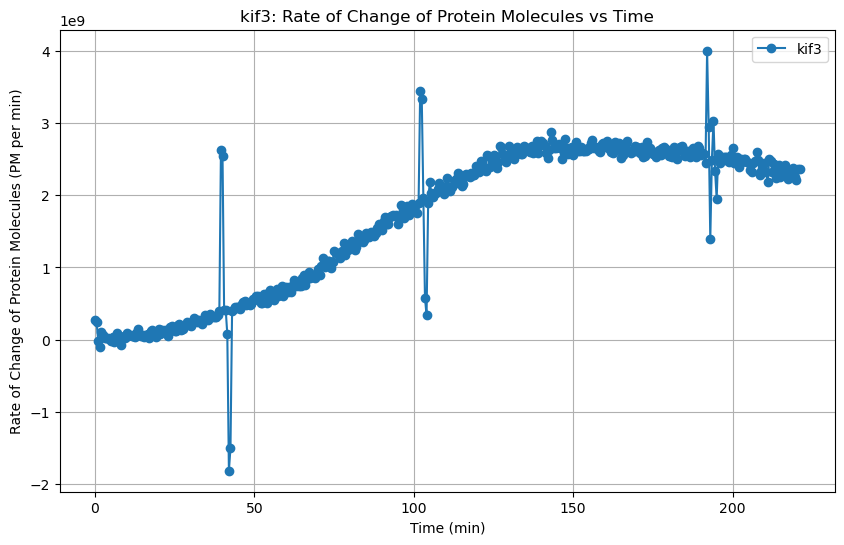

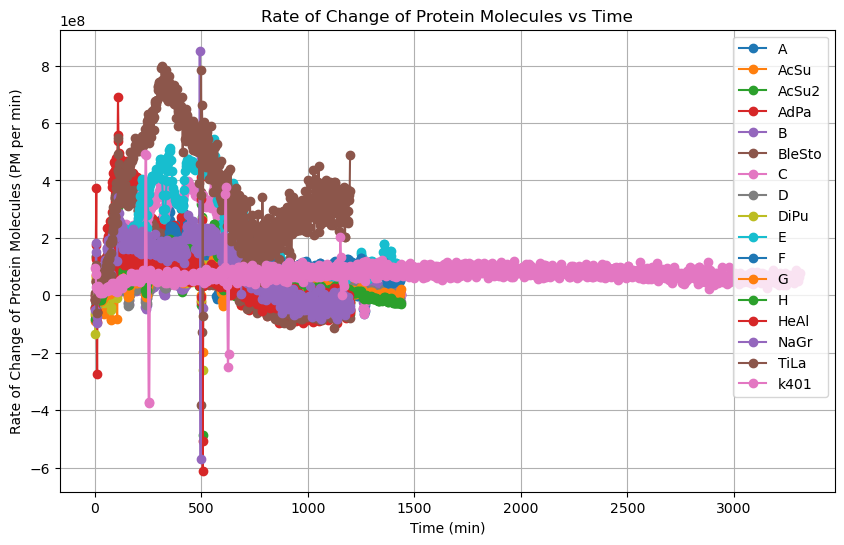

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


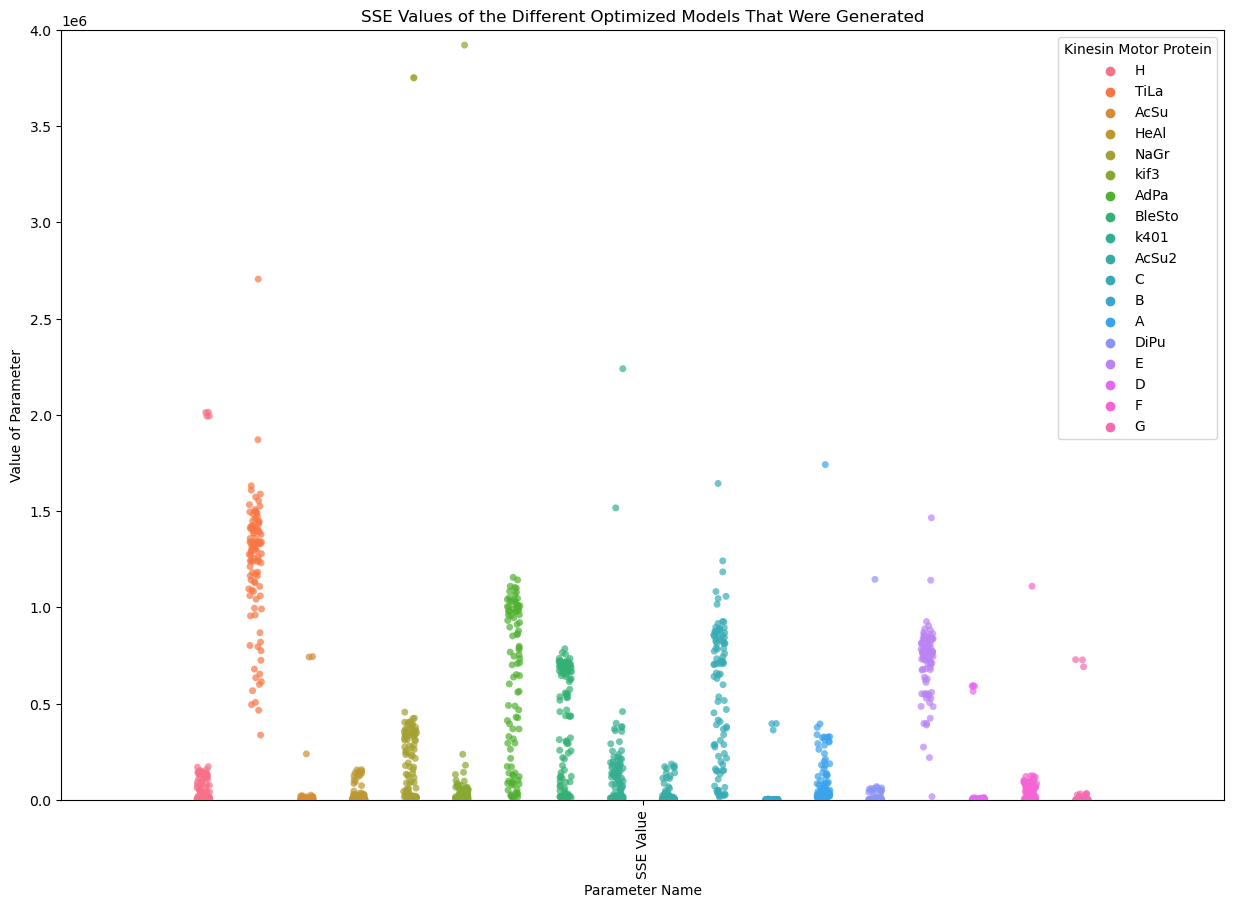

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


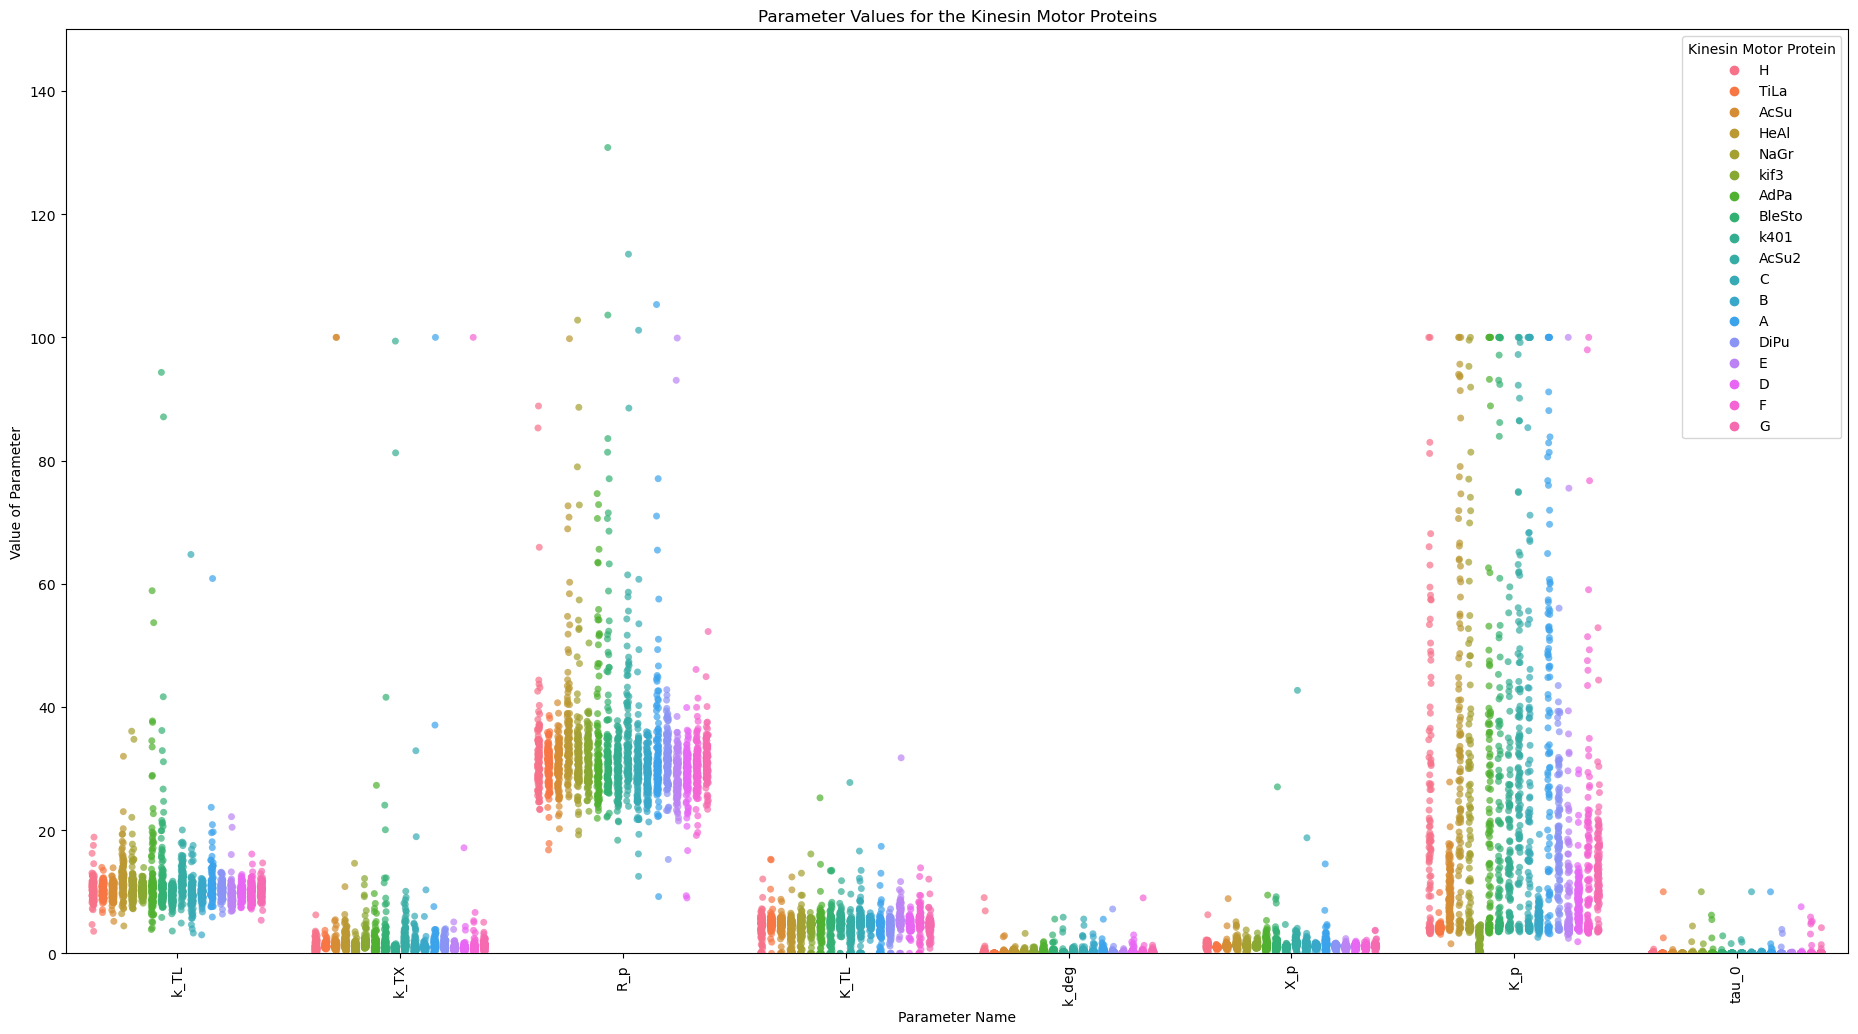

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


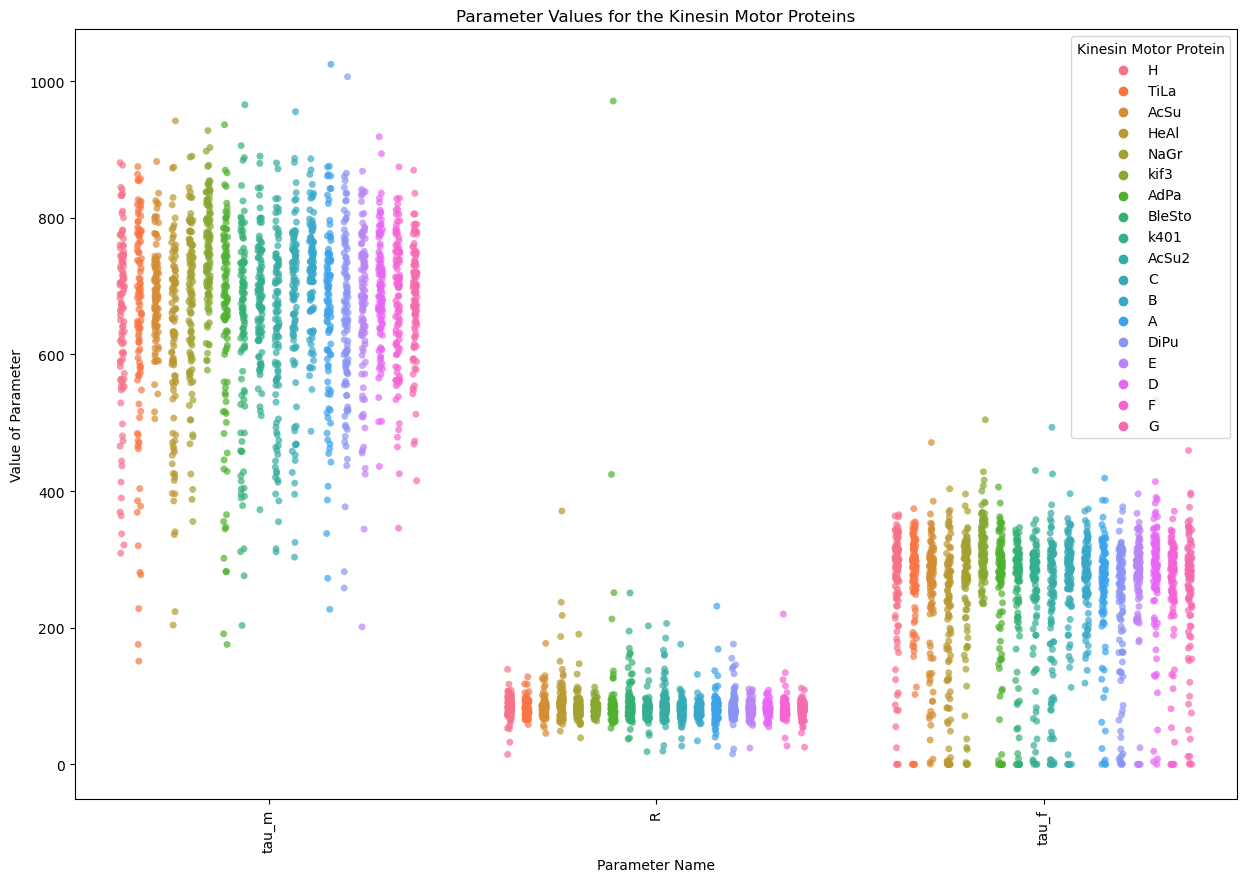

In [4]:
mp.showExperimentalDataTogether()
mp.showTheoreticalDataTogether()

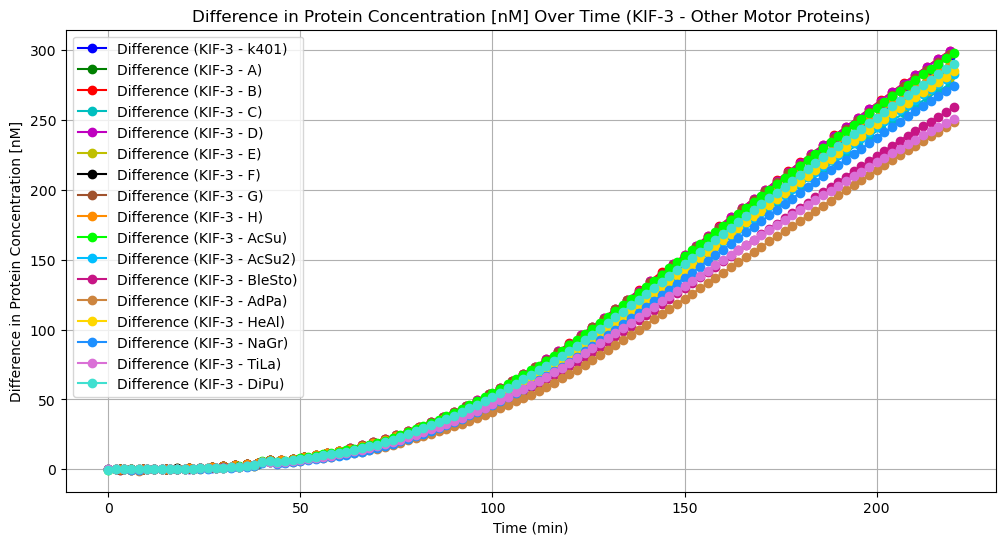

In [5]:
mp.plotProteinConcentrationDifference()

In [27]:
mp.compareTwoMotorProteins()

For the BEST found model (model with the least SSE), this is the percentage change of the optimized parameters between  kif3  and  NaGr :

k_TL:   252.29163033418388%
k_TX:   49.43257591652089%
R_p:   8.090901158376404%
tau_m:   0.052829432170263306%
K_TL:   18.28854782468447%
R:   20.02714220014038%
k_deg:   22.59560398467261%
X_p:   137.48218960542638%
K_p:   1126.720279616524%
tau_0:   100.0%
tau_f:   1.2255730929291986%
